# Ciência dos Dados - PROJETO 1


Stephanie Wertheimer de Mello


## TÍTULO DO SEU PROJETO

___
## Introdução


Atualmente, o acesso à Internet vem passando por um intenso processo de democratização. O que antes era um prívilégio apenas às camadas economicamente favorecidas, agora está sendo viável à parcela mais pobre da população. De acordo com dados fornecidos pelo IBGE (Instituto Brasileiro de Geografia e Estatística), de 2013 para 2014, o acesso à internet nas residências brasileiras superou os 50%. Em 2013 o índice de casas conectadas era de 48% e em 2014, 54,9%. 
Esse projeto visa investigar se existe relação entre o a condição das moradias no Brasil, fator que geralmente está acoplado a renda, e seu acesso à internet.

A pesquisa será feita utilizando-se a divisão regional do brasileira, comparando a porcentagem de moradias classificadas como boa, média e ruim, de acordo com critérios que serão explicados no desenvolvimento da análise, a respeito da infraestrutura das casas, e a porcentagem de acesso à internet em domicílio, em cada região, em 3 diferentes anos. A região com pior situação de acesso à internet domiciliar será analisada especificamente, para entender como as outras variáveis se comportam e se relacionam.

O trabalho visa responder às seguintes perguntas:

Existe relação entre a variação da taxa de acesso a Internet em Domicílio no Brasil, para 2013, 2014 e 2015, com uma das variáveis analisadas, sendo elas Saneamento, Material da Parede,  acesso a Água Canalizada, Destino do Lixo e Renda? A região menos favorecida em termos de estrutura, renda e internet acompanham o mesmo padrão do Brasil?

A hipótese é de que a internet tem relação com, principalmente, os materiais usados na parede e com a renda. A região menos favorecida deve swer a Nordeste, e o padrão seguido nao é o do Brasil

Para fazer o estudo, as residências foram classificadas como Boa, Média e Ruim por meio de critérios variados de classificação das variáveis de infraestrutura. Abaixo, há a explicação de como isso foi categorizado:

- A renda nos gráficos está limitada a 2000 reais, por conta da divisão de quantis da renda na região Norte, que indica que o valor equivalente a 90% é inferior e próximo de 2000 em todos os anos. Isso permite que a renda seja melhor analisada. Só se considera o Norte porque será a única região analisada por renda.
- A destinação de lixo é considerada boa apenas para coleta direta ou indireta
- O saneamento é considerado bom apenas quando é de Rede Coletora de Esgoto.
- De acordo com o IBGE, em 2013, o PNAD considerou que as paredes poderiam ser feitas de materiais duráveis ou não duráveis, e como vivemos em um país tropical, com muita chuva, o material do qual uma casa é feita colabora para a compreensão da qualidade daquela moradia. Baseado nessa classificação, o material das paredes das casas será classificado com bom, quando for de Alvenaria, Madeira Aparelhada ou Taipa, e ruim para outros materiais. http://biblioteca.ibge.gov.br/visualizacao/periodicos/59/pnad_2013_v33_br.pdf'


___
## Análise e Resultados

In [189]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [190]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\steph\OneDrive\Documents\Engenharia Insper\2° semestre\Ciência dos Dados\Ciencia-dos-Dados-


In [191]:
#Abrindo os arquivos
pnad13 = pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')
pnad14 = pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')
pnad15 = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


In [192]:
'''Transformando as Variáveis Qualitativas em Categorias '''

#material parede
pnad13.V0203 = pnad13.V0203.astype('category')
pnad13.V0203.cat.categories = ('Alvenaria', 'MadeiraAparelhada', 'TaipaRevestida', 'MadeiraAproveitada', 'Palha', 'Outro')
pnad14.V0203 = pnad14.V0203.astype('category')
pnad14.V0203.cat.categories = ('Alvenaria', 'MadeiraAparelhada', 'TaipaRevestida', 'MadeiraAproveitada', 'Palha', 'Outro')
pnad15.V0203 = pnad15.V0203.astype('category')
pnad15.V0203.cat.categories = ('Alvenaria', 'MadeiraAparelhada', 'TaipaRevestida', 'MadeiraAproveitada', 'Palha', 'Outro')

#água canalizada
pnad13.V0211 = pnad13.V0211.astype('category')
pnad13.V0211.cat.categories = ('Sim', 'Não')
pnad14.V0211 = pnad14.V0211.astype('category')
pnad14.V0211.cat.categories = ('Sim', 'Não')
pnad15.V0211 = pnad15.V0211.astype('category')
pnad15.V0211.cat.categories = ('Sim', 'Não')

#destino lixo
pnad13.V0218 = pnad13.V0218.astype('category')
pnad13.V0218.cat.categories = ('ColetaDireta', 'ColetaIndireta', 'Queimado/Enterrado', 'TerrenoBaldio', 'JogadoÁgua', 'Outro' )
pnad14.V0218 = pnad14.V0218.astype('category')
pnad14.V0218.cat.categories = ('ColetaDireta', 'ColetaIndireta', 'Queimado/Enterrado', 'TerrenoBaldio', 'JogadoÁgua', 'Outro' )
pnad15.V0218 = pnad15.V0218.astype('category')
pnad15.V0218.cat.categories = ('ColetaDireta', 'ColetaIndireta', 'Queimado/Enterrado', 'TerrenoBaldio', 'JogadoÁgua', 'Outro' )

#internet em domicílio
pnad13.V02322 = pnad13.V02322.astype('category')
pnad13.V02322.cat.categories = ('Sim', 'Não')
pnad14.V02322 = pnad14.V02322.astype('category')
pnad14.V02322.cat.categories = ('Sim', 'Não')
pnad15.V02322 = pnad15.V02322.astype('category')
pnad15.V02322.cat.categories = ('Sim', 'Não')

#forma de saneamento
pnad13.V0217 = pnad13.V0217.astype('category')
pnad13.V0217.cat.categories = ('RedeColetora', 'FossaSeptica1', 'FossaSeptica2', 'FossaRud', 'Vala','Água', 'Outro')
pnad14.V0217 = pnad14.V0217.astype('category')
pnad14.V0217.cat.categories = ('RedeColetora', 'FossaSeptica1', 'FossaSeptica2', 'FossaRud', 'Vala','Água', 'Outro')
pnad15.V0217 = pnad15.V0217.astype('category')
pnad15.V0217.cat.categories = ('RedeColetora', 'FossaSeptica1', 'FossaSeptica2', 'FossaRud', 'Vala','Água', 'Outro')

In [193]:
'''Definindo as Cinco Regiões Brasileiras'''


pnad13.loc[(pnad13.UF==11)|(pnad13.UF==12)|(pnad13.UF==13)|(pnad13.UF==14)|(pnad13.UF==15)|(pnad13.UF==16)|(pnad13.UF==17),'Reg'] = 'Norte'
pnad13.loc[(pnad13.UF==21)|(pnad13.UF==22)|(pnad13.UF==23)|(pnad13.UF==24)|(pnad13.UF==25)|(pnad13.UF==26)|(pnad13.UF==27)|(pnad13.UF==28)|(pnad13.UF==29), 'Reg']='Nordeste'
pnad13.loc[(pnad13.UF==31)|(pnad13.UF==32)|(pnad13.UF==33)|(pnad13.UF==35), 'Reg']='Sudeste'
pnad13.loc[(pnad13.UF==41)|(pnad13.UF==42)|(pnad13.UF==43), 'Reg']='Sul'
pnad13.loc[(pnad13.UF==50)|(pnad13.UF==51)|(pnad13.UF==52)|(pnad13.UF==53), 'Reg']='Centro-Oeste'


pnad14.loc[(pnad14.UF==11)|(pnad14.UF==12)|(pnad14.UF==13)|(pnad14.UF==14)|(pnad14.UF==15)|(pnad14.UF==16)|(pnad14.UF==17),'Reg'] = 'Norte'
pnad14.loc[(pnad14.UF==21)|(pnad14.UF==22)|(pnad14.UF==23)|(pnad14.UF==24)|(pnad14.UF==25)|(pnad14.UF==26)|(pnad14.UF==27)|(pnad14.UF==28)|(pnad14.UF==29), 'Reg']='Nordeste'
pnad14.loc[(pnad14.UF==31)|(pnad14.UF==32)|(pnad14.UF==33)|(pnad14.UF==35), 'Reg']='Sudeste'
pnad14.loc[(pnad14.UF==41)|(pnad14.UF==42)|(pnad14.UF==43), 'Reg']='Sul'
pnad14.loc[(pnad14.UF==50)|(pnad14.UF==51)|(pnad14.UF==52)|(pnad14.UF==53), 'Reg']='Centro-Oeste'


pnad15.loc[(pnad15.UF==11)|(pnad15.UF==12)|(pnad15.UF==13)|(pnad15.UF==14)|(pnad15.UF==15)|(pnad15.UF==16)|(pnad15.UF==17),'Reg'] = 'Norte'
pnad15.loc[(pnad15.UF==21)|(pnad15.UF==22)|(pnad15.UF==23)|(pnad15.UF==24)|(pnad15.UF==25)|(pnad15.UF==26)|(pnad15.UF==27)|(pnad15.UF==28)|(pnad15.UF==29), 'Reg']='Nordeste'
pnad15.loc[(pnad15.UF==31)|(pnad15.UF==32)|(pnad15.UF==33)|(pnad15.UF==35), 'Reg']='Sudeste'
pnad15.loc[(pnad15.UF==41)|(pnad15.UF==42)|(pnad15.UF==43), 'Reg']='Sul'
pnad15.loc[(pnad15.UF==50)|(pnad15.UF==51)|(pnad15.UF==52)|(pnad15.UF==53), 'Reg']='Centro-Oeste'

In [257]:
'''Delimitando Dataframe 2013'''


data13 = pd.DataFrame(pnad13.loc[:,['Reg','V0217','V0203','V0211','V0218','V02322','V4621']]).dropna()

data13['Nível']='Médio'


data13.columns=['Região','Saneamento','MaterialParede', 'ÁguaCanalizada', 'DestinoLixo','InternetDomicílio', 'RendMensalPerCapita', 'Nível']


data13.loc[(data13.RendMensalPerCapita != 999999999999), "Renda"] = data13.RendMensalPerCapita

data13 = data13.drop('RendMensalPerCapita', 1)

 


data13.loc[((data13.MaterialParede=='Alvenaria')|(data13.MaterialParede=='MadeiraAparelhada')|(data13.MaterialParede=='TaipaRevestida'))&(data13.ÁguaCanalizada=='Sim')&((data13.DestinoLixo=='ColetaIndireta')|(data13.DestinoLixo=='ColetaDireta'))&(data13.Saneamento=='RedeColetora'), 'Nível']= 'Bom'
data13.loc[((data13.MaterialParede=='MadeiraAproveitada')|(data13.MaterialParede== 'Palha')|(data13.MaterialParede=='Outro'))&(data13.ÁguaCanalizada=='Não')&((data13.DestinoLixo=='Queimado/Enterrado')|(data13.DestinoLixo=='TerrenoBaldio')|(data13.DestinoLixo=='JogadoÁgua')|(data13.DestinoLixo=='Outro'))&((data13.Saneamento=='FossaRud')|(data13.Saneamento=='FossaSeptica1')|(data13.Saneamento=='FossaSeptica2')|(data13.Saneamento=='Vala')|(data13.Saneamento=='Água')|(data13.Saneamento=='Outro')), 'Nível']= 'Ruim'
data13.loc[(data13.Saneamento != "RedeColetora"), "Nível"] = "Ruim"


In [258]:
'''Delimitando Dataframe 2014'''

data14 = pd.DataFrame(pnad14.loc[:,['Reg','V0217','V0203','V0211','V0218','V02322','V4621']]).dropna()

data14['Nível']='Médio'


data14.columns=['Região','Saneamento','MaterialParede', 'ÁguaCanalizada', 'DestinoLixo','InternetDomicílio', 'RendMensalPerCapita', 'Nível']


data14.loc[(data14.RendMensalPerCapita != 999999999999), "Renda"] = data14.RendMensalPerCapita

data14 = data14.drop('RendMensalPerCapita', 1)

 


data14.loc[((data14.MaterialParede=='Alvenaria')|(data14.MaterialParede=='MadeiraAparelhada')|(data14.MaterialParede=='TaipaRevestida'))&(data14.ÁguaCanalizada=='Sim')&((data14.DestinoLixo=='ColetaIndireta')|(data14.DestinoLixo=='ColetaDireta'))&(data14.Saneamento=='RedeColetora'), 'Nível']= 'Bom'
data14.loc[((data14.MaterialParede=='MadeiraAproveitada')|(data14.MaterialParede== 'Palha')|(data14.MaterialParede=='Outro'))&(data14.ÁguaCanalizada=='Não')&((data14.DestinoLixo=='Queimado/Enterrado')|(data14.DestinoLixo=='TerrenoBaldio')|(data14.DestinoLixo=='JogadoÁgua')|(data14.DestinoLixo=='Outro'))&((data14.Saneamento=='FossaRud')|(data14.Saneamento=='FossaSeptica1')|(data14.Saneamento=='FossaSeptica2')|(data14.Saneamento=='Vala')|(data14.Saneamento=='Água')|(data14.Saneamento=='Outro')), 'Nível']= 'Ruim'
data14.loc[(data14.Saneamento != "RedeColetora"), "Nível"] = "Ruim"



In [260]:
'''Delimitando Dataframe 2015'''

data15 = pd.DataFrame(pnad15.loc[:,['Reg','V0217','V0203','V0211','V0218','V02322','V4621']]).dropna()

data15['Nível']='Médio'


data15.columns=['Região','Saneamento','MaterialParede', 'ÁguaCanalizada', 'DestinoLixo','InternetDomicílio', 'RendMensalPerCapita', 'Nível']


data15.loc[(data15.RendMensalPerCapita != 999999999999), "Renda"] = data15.RendMensalPerCapita

data15 = data15.drop('RendMensalPerCapita', 1)

 


data15.loc[((data15.MaterialParede=='Alvenaria')|(data15.MaterialParede=='MadeiraAparelhada')|(data15.MaterialParede=='TaipaRevestida'))&(data15.ÁguaCanalizada=='Sim')&((data15.DestinoLixo=='ColetaIndireta')|(data15.DestinoLixo=='ColetaDireta'))&(data15.Saneamento=='RedeColetora'), 'Nível']= 'Bom'
data15.loc[((data15.MaterialParede=='MadeiraAproveitada')|(data15.MaterialParede== 'Palha')|(data15.MaterialParede=='Outro'))&(data15.ÁguaCanalizada=='Não')&((data15.DestinoLixo=='Queimado/Enterrado')|(data15.DestinoLixo=='TerrenoBaldio')|(data15.DestinoLixo=='JogadoÁgua')|(data15.DestinoLixo=='Outro'))&((data15.Saneamento=='FossaRud')|(data15.Saneamento=='FossaSeptica1')|(data15.Saneamento=='FossaSeptica2')|(data15.Saneamento=='Vala')|(data15.Saneamento=='Água')|(data15.Saneamento=='Outro')), 'Nível']= 'Ruim'
data15.loc[(data15.Saneamento != "RedeColetora"), "Nível"] = "Ruim"



In [261]:
"""Determinação de faixas da variável quantitativa: Renda Mensal Per Capita"""


'Determinação de faixas da variável quantitativa: Renda Mensal Per Capita'

Para fazer o corte de renda, será utilizada a renda considerando o percentil de 90% apenas na região Norte, porque o gráfico de renda será analisado apenas para essa região.

In [199]:
print(data13[data13.Região=="Norte"].quantile(np.arange(0,1.10,.10)))

       Renda
0.0      0.0
0.1    156.0
0.2    240.0
0.3    328.0
0.4    400.0
0.5    516.0
0.6    678.0
0.7    785.0
0.8   1050.0
0.9   1666.0
1.0  29500.0


In [200]:
print(data14[data14.Região=="Norte"].quantile(np.arange(0,1.10,.10)))

       Renda
0.0      0.0
0.1    188.0
0.2    281.0
0.3    362.0
0.4    466.0
0.5    584.0
0.6    724.0
0.7    861.0
0.8   1174.0
0.9   1860.0
1.0  45000.0


In [201]:
print(data15[data15.Região=="Norte"].quantile(np.arange(0,1.10,.10)))

       Renda
0.0      0.0
0.1    200.0
0.2    288.0
0.3    388.0
0.4    472.0
0.5    596.0
0.6    767.4
0.7    866.0
0.8   1169.0
0.9   1796.4
1.0  45000.0


In [202]:
#numero de linhas que pertencem à região norte = n
n=15696
k=math.sqrt(n)
print("Número de Faixas =", k)




amplitude13=2000/k

print("Amplitude = ", amplitude13)

Número de Faixas = 125.2836781069266
Amplitude =  15.963771420352524


In [264]:
"""Determinação das rendas - de quantitativo para qualitativo"""

faixa = range(0,2000,150)

rendacat13 = pd.cut(data13.Renda, bins=faixa, right=True)

ut13 = (rendacat13.value_counts(sort=False, normalize=True)*100).round(decimals=20)


rendacat14 = pd.cut(data14.Renda, bins=faixa, right=True)

ut14 = (rendacat14.value_counts(sort=False, normalize=True)*100).round(decimals=20)


rendacat15 = pd.cut(data15.Renda, bins=faixa, right=True)

ut15 = (rendacat15.value_counts(sort=False, normalize=True)*100).round(decimals=20)




In [204]:
nivel13 = (data13.Nível.value_counts(sort=False, normalize=True)*100).round(decimals=2)

In [205]:
nivel14 = (data14.Nível.value_counts(sort=False, normalize=True)*100).round(decimals=2)

In [206]:
nivel15 = (data13.Nível.value_counts(sort=False, normalize=True)*100).round(decimals=2)

In [207]:
internet13 = (data13.InternetDomicílio.value_counts(sort=False, normalize=True)*100).round(decimals=8)

In [208]:
internet14 = (data14.InternetDomicílio.value_counts(sort=False, normalize=True)*100).round(decimals=8)

In [209]:
internet15 = (data15.InternetDomicílio.value_counts(sort=False, normalize=True)*100).round(decimals=2)

Abaixo estão gráficos que mostram a evolução da presença de internet no Brasil em 2013, 2014 e 2015, e a situação de moradia nos mesmos anos.

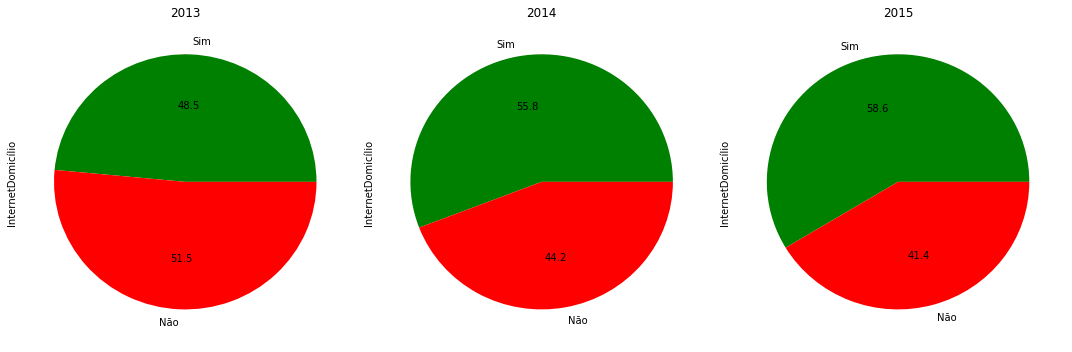

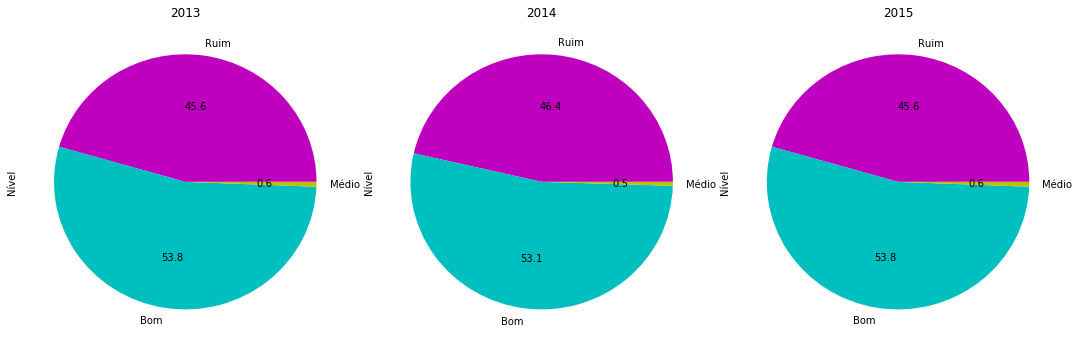

In [265]:
'''Evolução da Internet'''
colors=['g', 'r']
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = internet13.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = internet14.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = internet15.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()


'''Nível da Moradia'''
colors=['m', 'c', 'y']
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = nivel13.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = nivel14.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = nivel15.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()


Nos 6 gráficos de pizza acima, os três primeiros mostram o avanço da internet em 2013, 2014 e 2015, e os 3 últimos mostram a divisão entre moradias boas, médias e ruins para os mesmos anos, no Brasil todo. É possível perceber que a internet aumentou sua frequência de 48,5% para 58,6%, mesmo com as condições de moradia tendo se mantido praticamente estáveis. 

Abaixo estão os gráficos que comparam a condição de acesso à internet por regiao, para os três anos.

In [266]:
internet13n = (data13.InternetDomicílio[data13.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet14n = (data14.InternetDomicílio[data14.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet15n = (data15.InternetDomicílio[data15.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=8)

In [267]:
internet13ne = (data13.InternetDomicílio[data13.Região=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet14ne = (data14.InternetDomicílio[data14.Região=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet15ne = (data15.InternetDomicílio[data15.Região=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)

In [268]:
internet13s = (data13.InternetDomicílio[data13.Região=='Sul'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet14s = (data14.InternetDomicílio[data14.Região=='Sul'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet15s = (data15.InternetDomicílio[data15.Região=='Sul'].value_counts(sort=False, normalize=True)*100).round(decimals=8)

In [269]:
internet13se = (data13.InternetDomicílio[data13.Região=='Sudeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet14se = (data14.InternetDomicílio[data14.Região=='Sudeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet15se = (data15.InternetDomicílio[data15.Região=='Sudeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)

In [270]:
internet13co = (data13.InternetDomicílio[data13.Região=='Centro-Oeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet14co = (data14.InternetDomicílio[data14.Região=='Centro-Oeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)
internet15co = (data15.InternetDomicílio[data15.Região=='Centro-Oeste'].value_counts(sort=False, normalize=True)*100).round(decimals=8)

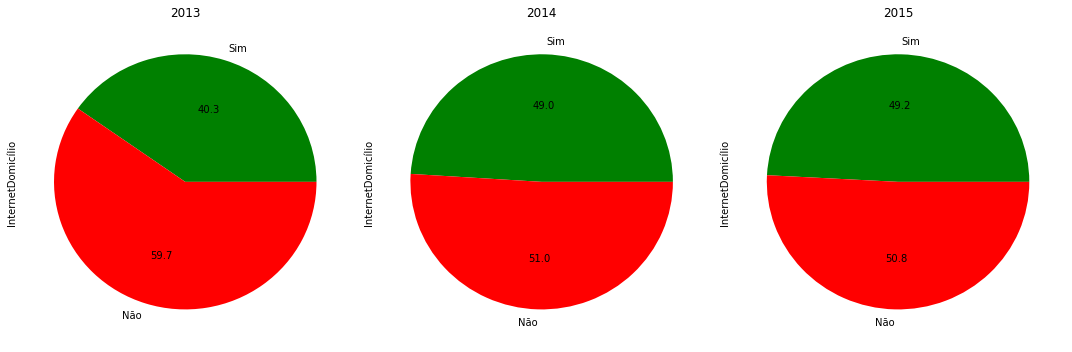

NORTE


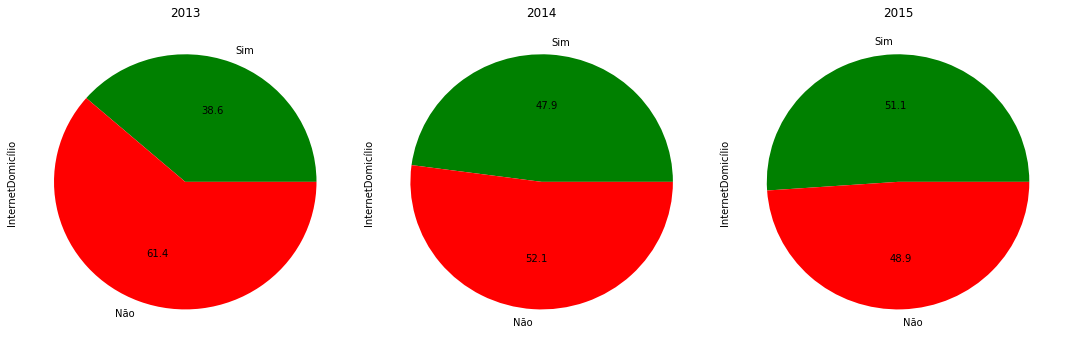

NORDESTE


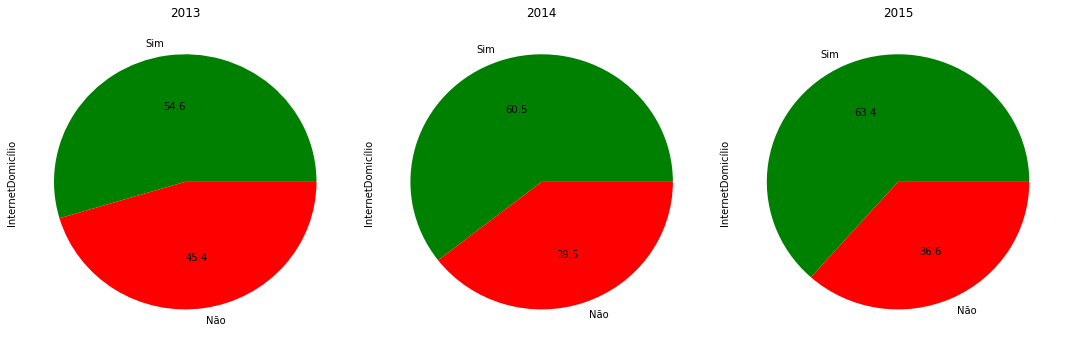

SUL


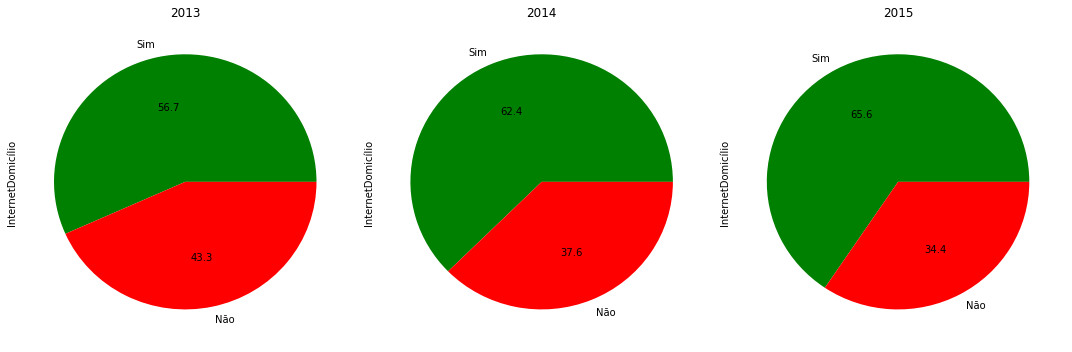

SUDESTE


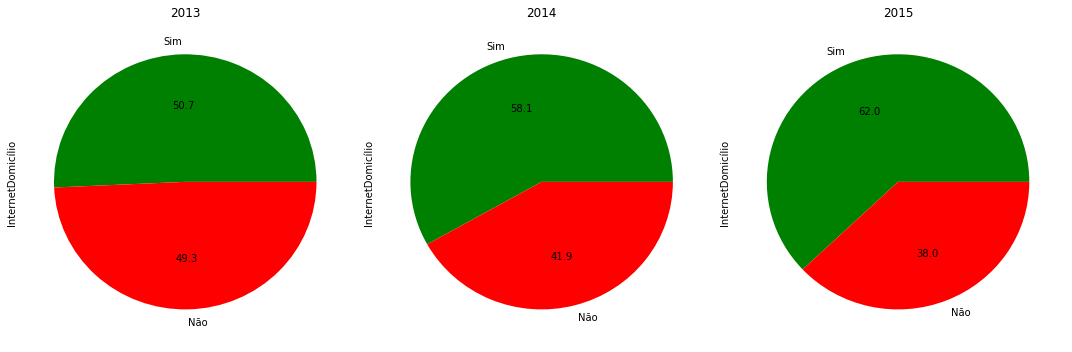

CENTRO-OESTE


In [271]:
'''Evolução da Internet por ano por região'''
colors=['g', 'r']
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = internet13n.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = internet14n.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = internet15n.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

print("NORTE")


fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = internet13ne.plot(kind='pie', colors=colors ,autopct='%.1f',title='2013')

plt.subplot(132)
plot = internet14ne.plot(kind='pie', colors=colors ,autopct='%.1f',title='2014')

plt.subplot(133)
plot = internet15ne.plot(kind='pie', colors=colors ,autopct='%.1f',title='2015')

plt.tight_layout()
plt.show()

print("NORDESTE")


fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = internet13s.plot(kind='pie', colors=colors ,autopct='%.1f',title='2013')

plt.subplot(132)
plot = internet14s.plot(kind='pie', colors=colors ,autopct='%.1f',title='2014')

plt.subplot(133)
plot = internet15s.plot(kind='pie', colors=colors ,autopct='%.1f',title='2015')

plt.tight_layout()
plt.show()

print("SUL")


fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = internet13se.plot(kind='pie', colors=colors ,autopct='%.1f',title='2013')

plt.subplot(132)
plot = internet14se.plot(kind='pie', colors=colors ,autopct='%.1f',title='2014')

plt.subplot(133)
plot = internet15se.plot(kind='pie', colors=colors ,autopct='%.1f',title='2015')

plt.tight_layout()
plt.show()

print("SUDESTE")



fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = internet13co.plot(kind='pie', colors=colors ,autopct='%.1f',title='2013')

plt.subplot(132)
plot = internet14co.plot(kind='pie', colors=colors ,autopct='%.1f',title='2014')

plt.subplot(133)
plot = internet15co.plot(kind='pie', colors=colors ,autopct='%.1f',title='2015')

plt.tight_layout()
plt.show()

print("CENTRO-OESTE")



De acordo com os gráficos acima, é possível perceber que a internet apresentou um aumento em todas as regiões do país. A diferença de internet por região de 2013 para 2015 é apresentada abaixo:

Norte: 8,9%

Nordeste: 12,5%

Sul: 8,8%

Sudeste: 8,9%

Centro-Oeste: 11,3%

As regiões com maior percentual de acesso à internet se mantiveram, sendo elas o Sul e Sudeste, enquanto as duas regiões com o menor percentual também não sofreram alteração, sendo elas o Norte e o Nordeste.
Apesar de o Nordeste ter apresentado o maior avanço percentual em quantidade de Internet, ainda mantém-se atrás de todos os outros estados, com excessão do Norte. O Norte aumentou percentualmente menos, então já estava atrás e assim continua.
Dessa forma, pode-se concluir que o acesso à internet domiciliar é mais precário no Norte.

Agora, seguem os gráficos que comparam, nos três anos, como variou a disposição das residências entre bom, médio e ruim.

In [272]:
nivel13n = (data13.Nível[data13.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel14n = (data14.Nível[data14.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel15n = (data15.Nível[data15.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=1)

nivel13ne = (data13.Nível[data13.Região=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel14ne = (data14.Nível[data14.Região=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel15ne = (data15.Nível[data15.Região=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)

nivel13s = (data13.Nível[data13.Região=='Sul'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel14s = (data14.Nível[data14.Região=='Sul'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel15s = (data15.Nível[data15.Região=='Sul'].value_counts(sort=False, normalize=True)*100).round(decimals=1)

nivel13se = (data13.Nível[data13.Região=='Sudeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel14se = (data14.Nível[data14.Região=='Sudeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel15se = (data15.Nível[data15.Região=='Sudeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)

nivel13co = (data13.Nível[data13.Região=='Centro-Oeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel14co = (data14.Nível[data14.Região=='Centro-Oeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
nivel15co = (data15.Nível[data15.Região=='Centro-Oeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)

NORTE


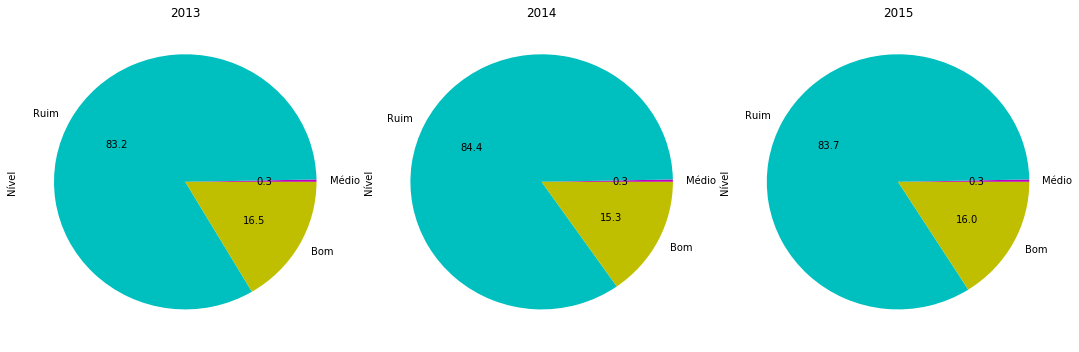

NORDESTE


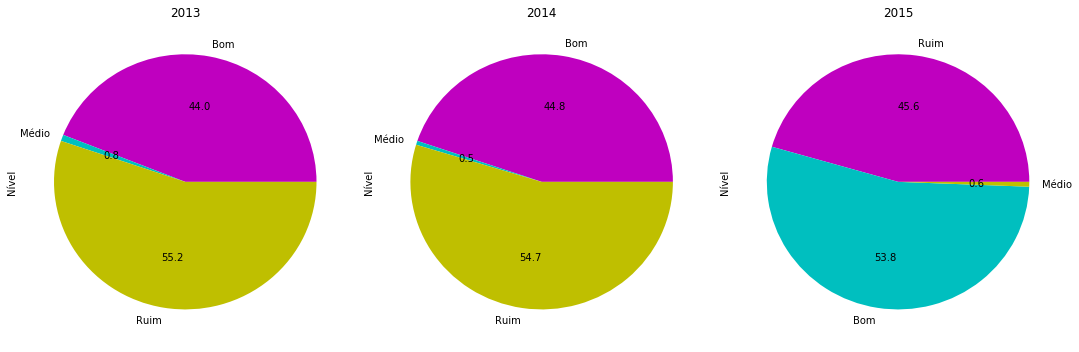

SUL


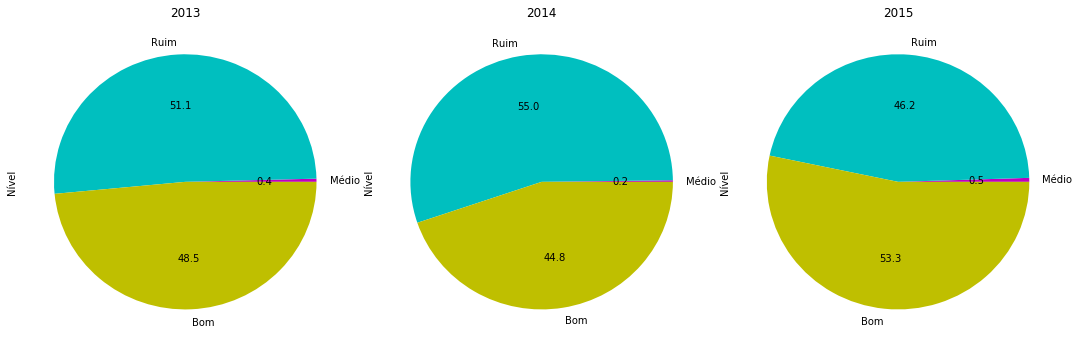

SUDESTE


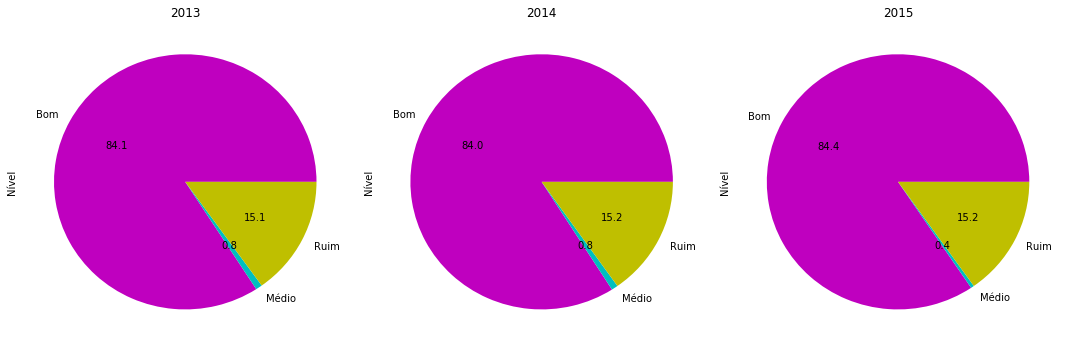

CENTRO-OESTE


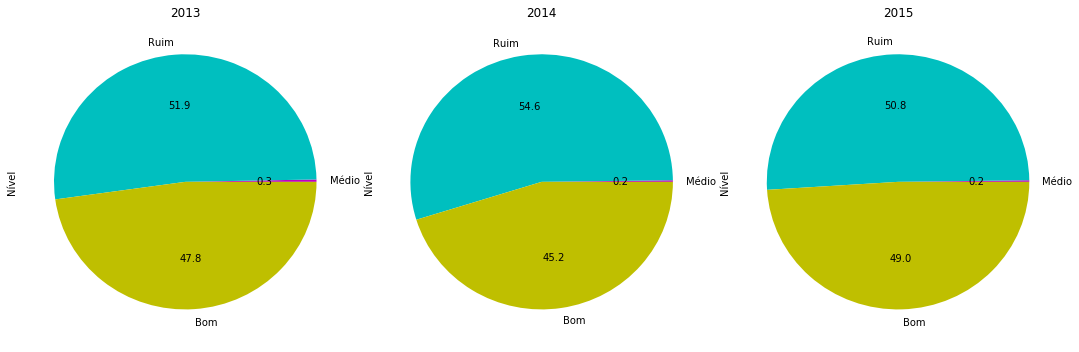

In [273]:
'''Evolução da moradia por ano por região'''


colors=['m', 'c', 'y']
fig = plt.figure(figsize=(15, 5))

print("NORTE")

plt.subplot(131)
plot = nivel13n.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = nivel14n.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = nivel15n.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

print("NORDESTE")

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = nivel13ne.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = nivel14ne.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = nivel15.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

print("SUL")

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = nivel13s.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = nivel14s.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = nivel15s.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

print("SUDESTE")

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = nivel13se.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = nivel14se.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = nivel15se.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 5))

print('CENTRO-OESTE')

plt.subplot(131)
plot = nivel13co.plot(kind='pie',title='2013', colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = nivel14co.plot(kind='pie',title='2014', colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = nivel15co.plot(kind='pie',title='2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

Analisando os gráficos acima, percebe-se que o nível das moradias muda de acordo com a região analisada. Ao longo dos anos, o desenvolvimento das moradias nas diferentes regiões manteve uma relativa estabilidade.

Abaixo estão as diferenças entre as porcentagens de casas consideradas boas, de 2013 e 2015, para cada região:

Norte: -0,5%

Nordeste: 9,8%

Sul: 4,8%

Sudeste: 0,3%

Centro-Oeste: 1,2%

Pode-se notar que o Norte sofreu uma regressão na porcentagem de casas consideradas boas, enquanto as outras regiões sofreram diferentes aumentos.

Assim, relacionando essa informação com os gráficos de avanço de internet por região, por ano, obtidos anteriormente, nota-se que a internet aumentou tanto em situações de avanço como em situacões de regressão na qualidade das moradias.

In [274]:
''"Crosstab de internet e nível de moradia"''

ctz13=(pd.crosstab(data13.Nível, data13.InternetDomicílio, margins=True,  rownames=['Região'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

ctz14=(pd.crosstab(data14.Nível, data14.InternetDomicílio, margins=True,  rownames=['Região'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

ctz15=(pd.crosstab(data15.Nível, data15.InternetDomicílio, margins=True,  rownames=['Região'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)


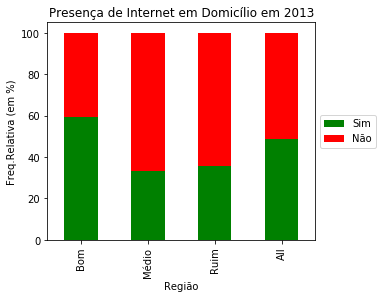

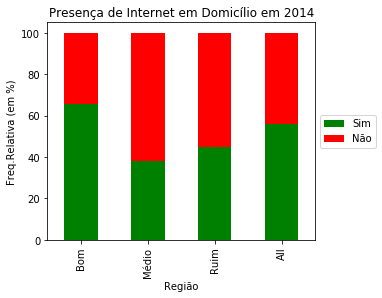

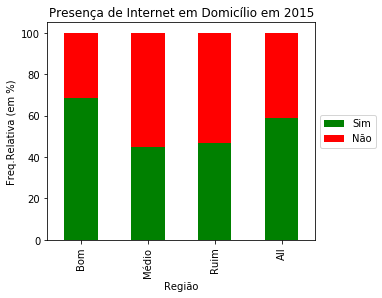

In [220]:
plot = ctz13.plot(kind='bar', stacked=True,title='Presença de Internet em Domicílio em 2013', color=('g', 'r'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = ctz14.plot(kind='bar', stacked=True,title='Presença de Internet em Domicílio em 2014', color=('g', 'r'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = ctz15.plot(kind='bar', stacked=True,title='Presença de Internet em Domicílio em 2015', color=('g', 'r'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Os gráficos de barra acima mostram que a internet avançou em moradias de todos os níveis ao longo do país, em diferentes proporções. Considerando os critérios usados para qualificar as casas como boa, média ou ruim, percebe-se que não existe muita diferença no acesso à internet no Brasil em relação a casas ruins e médias, mas que casas boas sempre tem uma taxa maior do que as outras, e maior também do que a média.






Agora, para entender melhor como a internet avançou em moradias consideradas ruins, será feita a divisão de avanço da internet por região, por ano, apenas em moradias classificadas como ruins.

In [278]:
"""Crosstab de regiao por internet para domicílios ruins"""

ruimintregiao13=(pd.crosstab(data13.Região[data13.Nível=='Ruim'], data13.InternetDomicílio[data13.Nível=='Ruim'], margins=True,  rownames=['Região'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)
ruimintregiao14=(pd.crosstab(data14.Região[data14.Nível=='Ruim'], data14.InternetDomicílio[data14.Nível=='Ruim'], margins=True,  rownames=['Região'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)
ruimintregiao15=(pd.crosstab(data15.Região[data15.Nível=='Ruim'], data15.InternetDomicílio[data15.Nível=='Ruim'], margins=True,  rownames=['Região'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

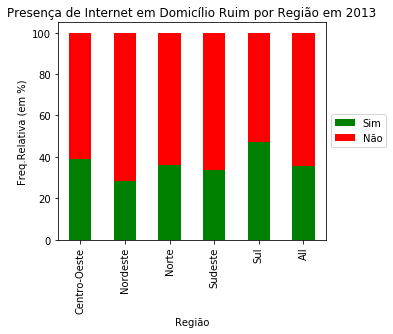

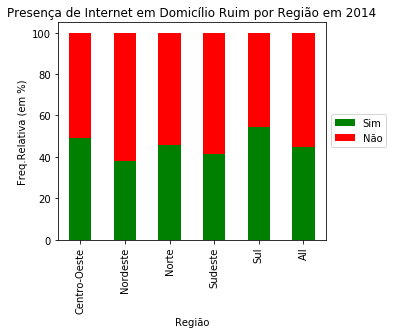

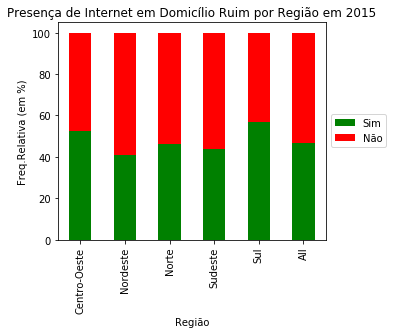

In [279]:
plot = ruimintregiao13.plot(kind='bar', stacked=True,title='Presença de Internet em Domicílio Ruim por Região em 2013', color=('g', 'r'))
plt.ylabel('Freq.Relativa (em %)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = ruimintregiao14.plot(kind='bar', stacked=True,title='Presença de Internet em Domicílio Ruim por Região em 2014', color=('g', 'r'))
plt.ylabel('Freq.Relativa (em %)')


#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = ruimintregiao15.plot(kind='bar', stacked=True,title='Presença de Internet em Domicílio Ruim por Região em 2015', color=('g', 'r'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




Os gráficos acima mostram que a porcentagem de internet aumentou em todas as regiões brasileiras, mesmo restringindo a análise às residências que se mantiveram ruins. Essa análise prova que com o passar dos anos, uma parcela da populção continua vivendo em condições precárias quando se trata das variáveis selecionadas, e ao mesmo tempo passam a ter acesso à internet.


A seguir, cada variável estudada será comparada separadamente ao acesso à internet no Brasil. Isso permitirá entender se existe uma variável de estrutura domiciliar que se relaciona com o índice de acesso à internet, e se existir, como ela se comporta.

# Estudo de Saneamento
Avanço do saneamento em relação ao acesso à internet no Brasil, nos três anos.

Quando se trata da variável Saneamento, só se enquadra na situação de moradia boa, casas com rede coletora de esgoto.

In [280]:
'''Tabela Cruzada Saneamento X Internet em % - 2013'''
cta=(pd.crosstab(data13.Saneamento, data13.InternetDomicílio, margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Saneamento X Internet em % - 2014'''
cta14=(pd.crosstab(data14.Saneamento, data14.InternetDomicílio, margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Saneamento X Internet em % - 2015'''
cta15=(pd.crosstab(data15.Saneamento, data15.InternetDomicílio, margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)


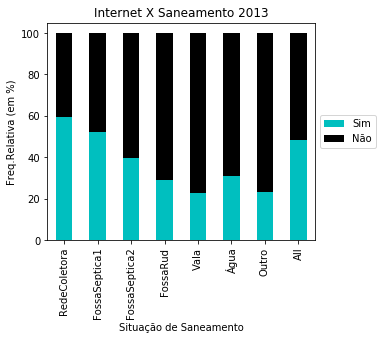

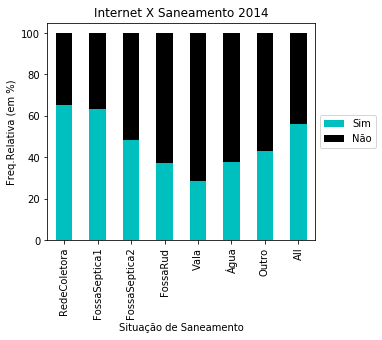

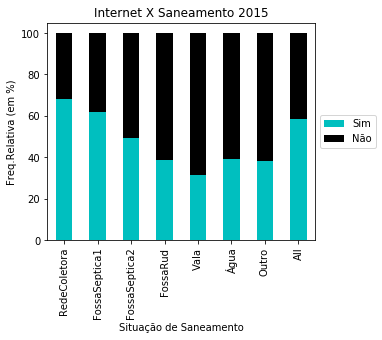

In [281]:
plot = cta.plot(kind='bar', stacked=True,title='Internet X Saneamento 2013', color=('c', 'k'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = cta14.plot(kind='bar', stacked=True,title='Internet X Saneamento 2014', color=('c', 'k'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = cta15.plot(kind='bar', stacked=True,title='Internet X Saneamento 2015', color=('c', 'k'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Quando a internet é comparada à forma de saneamento empregada nas residências, percebe-se que na maior parte dos casos, quanto melhor a condição de saneamento, maior é a porcentagem de internet domiciliar. Ao mesmo tempo, percebe-se um avanço da condição de internet com o passar dos anos, mesmo em domicílios que têm sistemas de saneamento rudimentares, mas esse avanço é proporcionalmente maior, conforme as condições de saneamento são melhores. Ainda assim, a tendência crescente de internet de acordo com melhores formas de saneamento se mantém. Ou seja, pode-se concluir que as condições de saneamento tem relação direta com a presença de internet. Essa relação direta está atrelada a outras variáveis, mas ainda assim é perceptível que as variáveis caminham juntas.



Também é perceptível que nos três anos, a proporção de internet associada à rede coletora de esgoto supera a média de internet de todas as formas, observada na barra "All".



In [282]:
"""Gráfico de pizza para saneamento"""

san13 = (data13.Saneamento.value_counts(sort=False, normalize=True)*100).round(decimals=1)
san14 = (data14.Saneamento.value_counts(sort=False, normalize=True)*100).round(decimals=1)
san15 = (data15.Saneamento.value_counts(sort=False, normalize=True)*100).round(decimals=1)

Os gráficos de pizza abaixo foram feitos para sustentar as conclusões baseadas nos gráficos que relacionam internet com saneamento no Brasil ao longo dos anos. Eles mostram como variou a matriz de saneamento nos três anos.

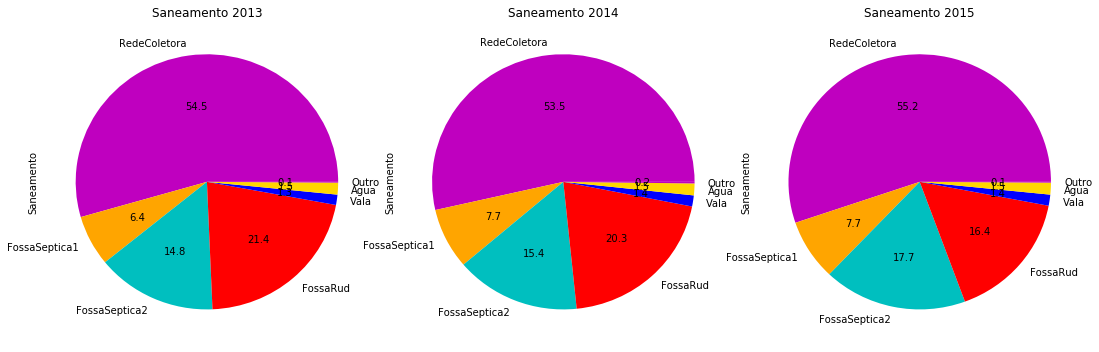

In [286]:
'''Gráficos de Pizza explicitando como o sistema de saneamento evoluiu ao longo dos anos'''


fig = plt.figure(figsize=(15, 5))


colors=('m', 'orange', 'c', 'r', 'b', 'gold')
plt.subplot(131)
plot = san13.plot(kind='pie',title='Saneamento 2013' , colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = san14.plot(kind='pie', title= 'Saneamento 2014',colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = san15.plot(kind='pie', title='Saneamento 2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()


Nota-se que com o passar dos anos, a matriz de saneamento se manteve relativamente estável. Isso confirma as conclusões anteriores de que as condições de saneamento concordam com a presença de internet,  porque o número de residências com cada forma de saneamento se manteve estável, e a internet sofreu as oscilações analisadas. Isso permite afirmar que houve uma melhora apenas na variável internet, e as condições sanitárias continuaram com as mesmas porporções, ou seja, casas sem um bom serviço de saneamento passaram a ter acesso à rede.

# Estudo de Material da Parede

Avanço do material usado em paredes em relação ao acesso à internet no Brasil, nos três anos.

Quando se trata da variável Material da Parede, só se enquadra na situação de moradia boa, casas com paredes de material durável, ou seja, Alvenaria, Madeira Aparelhada e Taipa.

In [287]:
'''Tabela Cruzada Material Parede X Internet - 2013'''
mp13=(pd.crosstab(data13.MaterialParede, data13.InternetDomicílio, margins=True,  rownames=['Situação de MaterialParede'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Material Parede X Internet - 2014'''
mp14=(pd.crosstab(data14.MaterialParede, data14.InternetDomicílio, margins=True,  rownames=['Situação de MaterialParede'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Material Parede X Internet - 2015'''
mp15=(pd.crosstab(data15.MaterialParede, data15.InternetDomicílio, margins=True,  rownames=['Situação de MaterialParede'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)


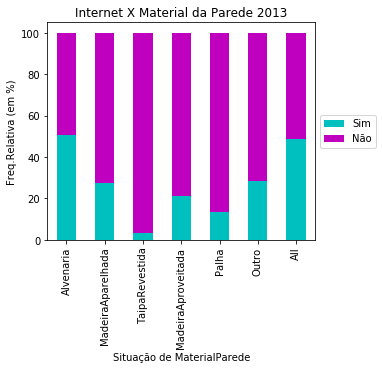

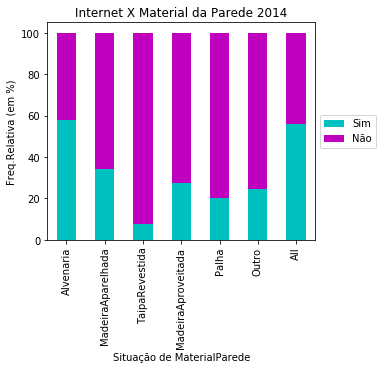

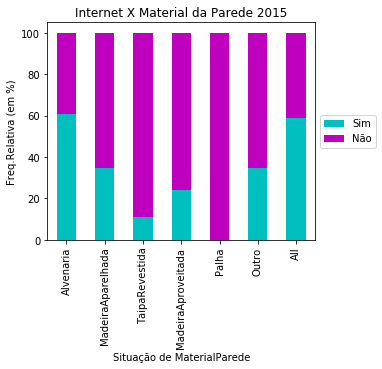

In [288]:
plot = mp13.plot(kind='bar', stacked=True,title='Internet X Material da Parede 2013', color=('c', 'm'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = mp14.plot(kind='bar', stacked=True,title='Internet X Material da Parede 2014', color=('c', 'm'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = mp15.plot(kind='bar', stacked=True,title='Internet X Material da Parede 2015', color=('c', 'm'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Quando se trata do material utilizado na parede das residências brasileiras, a relação entre a presença de internet e o material não é linear. Por exemplo, ao longo dos 3 anos, Taipa Revestida e Palha sofreram oscilações que não seguem um padrão, e os materiais considerados bons a um país tropical, os duráveis, nem sempre estão associados a altos níveis de acesso a internet. Nos três anos, a proporção de internet associada à Alvernaria supera a média de internet de todas as formas, observada na barra "All", e como a Alvenaria é a melhor forma de construção de uma casa, percebe-se que uma relação entre alvenaria e acesso à internet existe, mesmo que as outras formas de construção não sigam um padrão.

# Estudo de acesso a Água Canalizada

Avanço do acesso a água canalizada ao acesso à internet no Brasil, nos três anos.

Quando se trata da variável Material da Parede, só se enquadra na situação de moradia boa, casas com paredes de material durável, ou seja, Alvenaria, Madeira Aparelhada e Taipa.


In [289]:
'''Tabela Cruzada Água X Internet - 2013'''
agua13=(pd.crosstab(data13.ÁguaCanalizada, data13.InternetDomicílio, margins=True,  rownames=['Situação de Água'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Água X Internet - 2014'''
agua14=(pd.crosstab(data14.ÁguaCanalizada, data14.InternetDomicílio, margins=True,  rownames=['Situação de Água'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Água X Internet - 2015'''
agua15=(pd.crosstab(data15.ÁguaCanalizada, data15.InternetDomicílio, margins=True,  rownames=['Situação de Água'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)


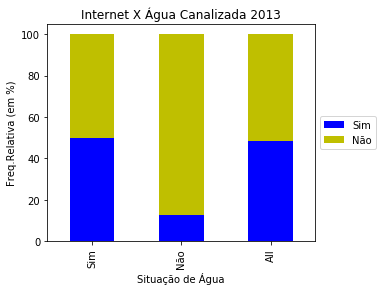

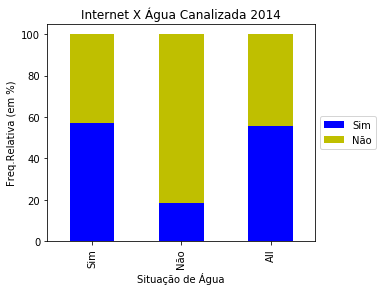

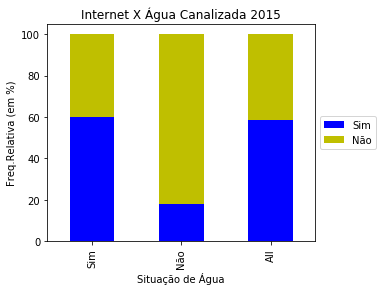

In [290]:
plot = agua13.plot(kind='bar', stacked=True,title='Internet X Água Canalizada 2013', color=('b', 'y'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = agua14.plot(kind='bar', stacked=True,title='Internet X Água Canalizada 2014', color=('b', 'y'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = agua15.plot(kind='bar', stacked=True,title='Internet X Água Canalizada 2015', color=('b', 'y'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Cruzando as condições de acesso a água canalizada com acesso a internet, estabelece-se relação entre maior ocorrência de internet em casas com água canalizada, percebendo que, assim como no caso do saneamento, água canalizada e internet tem uma relação direta, e o crescimento na presença de internet em casas com água canalizada é maior do que o mesmo para casas sem.

In [291]:
"""Gráfico de pizza para situação de agua canalizada"""

agua13 = (data13.ÁguaCanalizada.value_counts(sort=False, normalize=True)*100).round(decimals=1)
agua14 = (data14.ÁguaCanalizada.value_counts(sort=False, normalize=True)*100).round(decimals=1)
agua15 = (data15.ÁguaCanalizada.value_counts(sort=False, normalize=True)*100).round(decimals=1)

Os gráficos de pizza abaixo foram feitos para sustentar as conclusões baseadas nos gráficos que relacionam internet com acesso a água canalizada no Brasil ao longo dos anos. Eles mostram como variou a matriz de acesso a água nos três anos.

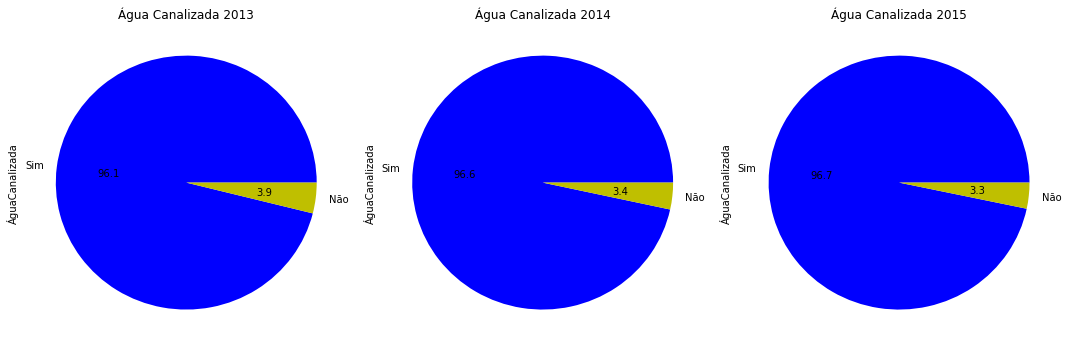

In [292]:
'''Gráficos de Pizza explicitando como o acesso a água canalizada evoluiu ao longo dos anos'''


fig = plt.figure(figsize=(15, 5))


colors=('b', 'y')
plt.subplot(131)
plot = agua13.plot(kind='pie',title='Água Canalizada 2013' , colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = agua14.plot(kind='pie', title= 'Água Canalizada 2014',colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = agua15.plot(kind='pie', title='Água Canalizada 2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()

Assim como foi feito para sustentar a análise da relação entre a forma de saneamento e internet, esses gráficos de pizza acima mostram que o acesso a água canalizada é quase total nos três anos e passou por poucas mudanças, sendo possível afirmar que a relação entre o acesso a água canalizada e internet realmente acontece. Nesse caso, a estabilidade da matriz do sistema de água foi acompanhado por uma certa establidade do aumento da internet. 

# Análise de Destino do Lixo

Avanço do destino do lixo em relação ao acesso à internet no Brasil, nos três anos.

Quando se trata da variável Destino do Lixo, só se enquadra na situação de moradia boa, casas que têm coleta direta ou indireta.


In [293]:
'''Tabela Cruzada Lixo X Internet - 2013'''
lixo13=(pd.crosstab(data13.DestinoLixo, data13.InternetDomicílio, margins=True,  rownames=['Destino do Lixo'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Lixo X Internet - 2014'''
lixo14=(pd.crosstab(data14.DestinoLixo, data14.InternetDomicílio, margins=True,  rownames=['Destino do Lixo'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Lixo X Internet - 2015'''
lixo15=(pd.crosstab(data15.DestinoLixo, data15.InternetDomicílio, margins=True,  rownames=['Destino do Lixo'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)


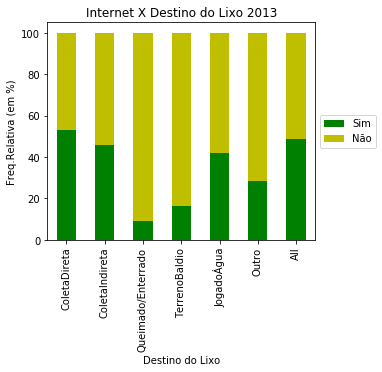

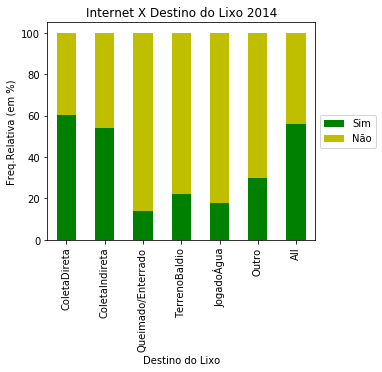

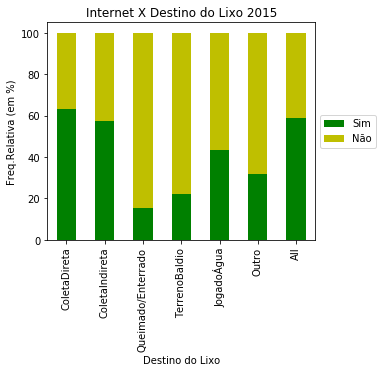

In [294]:
plot = lixo13.plot(kind='bar', stacked=True,title='Internet X Destino do Lixo 2013', color=('g', 'y'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = lixo14.plot(kind='bar', stacked=True,title='Internet X Destino do Lixo 2014', color=('g', 'y'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = lixo15.plot(kind='bar', stacked=True,title='Internet X Destino do Lixo 2015', color=('g', 'y'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

O destino do lixo não apresenta uma relação linear com o acesso a internet na maioria das categorias de destinação de lixo. Formas de destinação consideradas precárias apresentaram um grande aumento na porcentagem de internet, como por exemplo no caso do lixo jogado na água. Os maiores índices de internet, porém, acontecem entre as duas formas consideradas boas, a Coleta Direta e Indireta, onde a primeira supera os 50% e o valor médio em "All" nos três anos, e a segunda acompanha e média geral e supera os 50% em 2014. Assim, as oscilações apresentadas só permitem encontrar um padrão nas duas variáveis categorizadas como boas.

# Estudo de Saneamento na Região Norte

Considerando as análises aprofundadas relacionando a internet com cada variável desse estudo, percebe-se que aquela que mais apresenta uma relaçaõ entre o acesso a internet e boas condições de infraestrutura doméstica é a forma de Saneamento. Por outro lado, a região Norte apresentou um baixo aumento no índice de internet, apenas 8,9% entre 2013 e 2015 e sofreu uma redução de 0,5% na quantidade de casas categorizadas como boas.

Assim, sendo o Norte a região com condições de moradia e acesso à rede mais precário, ele será especificamente analisado em função do parâmetro que caminha com mais proximidade ao avanço de internet: o Saneamento.

In [296]:
'''Tabela Cruzada Saneamento X Internet Norte 2013'''
ctan=(pd.crosstab(data13.Saneamento[data13.Região=='Norte'], data13.InternetDomicílio[data13.Região=='Norte'], margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Saneamento X Internet Norte 2014'''
ctan14=(pd.crosstab(data14.Saneamento[data14.Região=='Norte'], data14.InternetDomicílio[data14.Região=='Norte'], margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)

'''Tabela Cruzada Saneamento X Internet Norte 2015'''
ctan15=(pd.crosstab(data15.Saneamento[data15.Região=='Norte'], data15.InternetDomicílio[data15.Região=='Norte'], margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Internet'], normalize='index')*100).round(decimals=1)


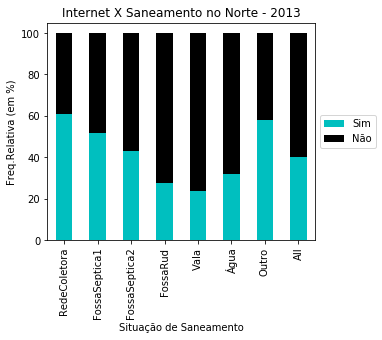

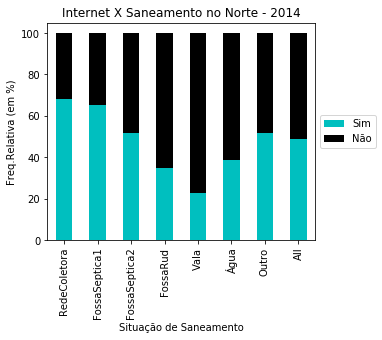

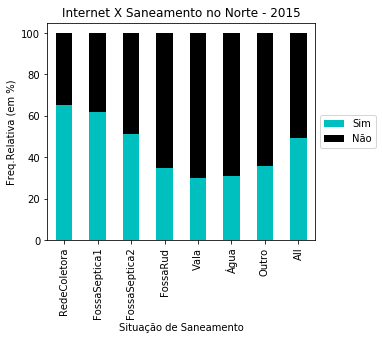

In [238]:
plot = ctan.plot(kind='bar', stacked=True,title='Internet X Saneamento no Norte - 2013', color=('c', 'k'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = ctan14.plot(kind='bar', stacked=True,title='Internet X Saneamento no Norte - 2014', color=('c', 'k'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = ctan15.plot(kind='bar', stacked=True,title='Internet X Saneamento no Norte - 2015', color=('c', 'k'))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Analisando os gráficos da situação de saneamento no Norte, percebe-se que o comportamento observado é semelhante ao observado no Brasil como um todo. Em 2013, a situação era mais heterogênea e o padrão não era tão visto, porque a porcentagem de casas com  internet em sistema de saneamento listado como "Outro" era próxima à de casas com rede coletora, 57,9% e 60,7%, respectivamente, e a porcentagem de "Outro" superava a média em "All". Já em 2015, passa a ser observado o mesmo padrão que o Brasil segue como um todo, em todos os anos, onde conforme a qualidade do saneamento aumenta, maior é a incidência de internet. Ao mesmo tempo, a coluna "Outro" na região Norte tem uma queda na porcentagem de internet de 2013 para 2015, de 57,9% a 49,2%. Em 2015, o Brasil como um todo tem a Rede Coletora e apenas a primeira Fossa Séptica superando a média em "All", e no Norte, tanto a Rede Coletora quanto ambas Fossas Sépticas superam a média. Considerando que a disposição das variáveis no gráfico vai da melhor à pior, com excessão de "Outro", da esquerda à direita, fica clara a relção entre essas duas variáveis, tanto no Brasil quanto no Norte.

In [239]:
san13n = (data13.Saneamento[data13.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=2)
san14n = (data14.Saneamento[data14.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=2)
san15n = (data15.Saneamento[data15.Região=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=2)


Da mesma forma que foi feito para a análise do Saneamento no Brasil, aqui há gráficos de pizza para a análise pontual do Norte.

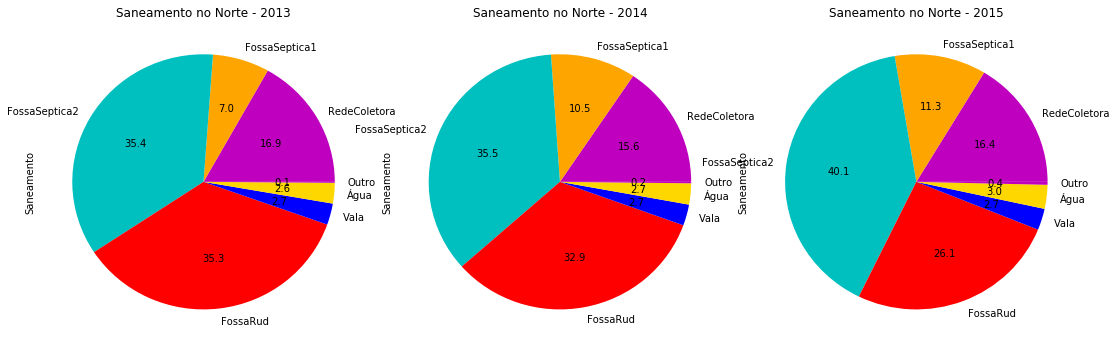

In [297]:
'''Gráficos de Pizza explicitando como o sistema de saneamento evoluiu ao longo dos anos no Norte'''


fig = plt.figure(figsize=(15, 5))

colors=('m', 'orange', 'c', 'r', 'b', 'gold')
plt.subplot(131)
plot = san13n.plot(kind='pie',title='Saneamento no Norte - 2013' , colors=colors ,autopct='%.1f')

plt.subplot(132)
plot = san14n.plot(kind='pie', title= 'Saneamento no Norte - 2014',colors=colors ,autopct='%.1f')

plt.subplot(133)
plot = san15n.plot(kind='pie', title='Saneamento no Norte - 2015', colors=colors ,autopct='%.1f')

plt.tight_layout()
plt.show()


Como no resto do Brasil, nota-se que com o passar dos anos, a matriz de saneamento se manteve relativamente estável, com excessão do aumento na rede coletora, que substituiu a fossa rudimentar. Isso confirma as conclusões anteriores de que as condições de saneamento concordam com a presença de internet. As maiores alterações vistas foram a mudança de Fossa Rudimentar para Rede Coletora, mas esse aspecto não anula o fato de que com tratamento de esgoto melhor, mais incidência de internet se observa. Esse comportamento se mantém nos três anos, já que sempre há mais internet em casas com Rede Coletora do que com Fossa Rudimentar. Isso permite afirmar que houve uma melhora na variável internet, e as condições de saneamento básico se mantiveram nas mesmas porporções, ou seja, casas sem um bom serviço de saneamento passaram a ter acesso à rede.

# Comparação de Saneamento e Renda

Como foi dito anteriormente, as condições de saneamento tem relação direta com a presença de internet, e essa relação está atrelada a outras variáveis, mas ainda assim é perceptível que as variáveis caminham juntas. Entre as variáveis que se relacionam, estão, por exemplo, a situação de acesso a água canalizada, como explicitado anteriormente. Agora, será estudada a situação de Renda Per Capita no Norte, e ela será comparada à situação de saneamento.

Abaixo, estão os gráficos de densidade de renda para 2013, 2014, 2015 na região Norte.

É importante ressaltar que a renda nos gráficos está limitada a 2000 reais, por conta da divisão de quantis da renda na região Norte, que indica que o valor equivalente a 90% é inferior e próximo de 2000 em todos os anos. Isso permite que a renda seja melhor analisada.

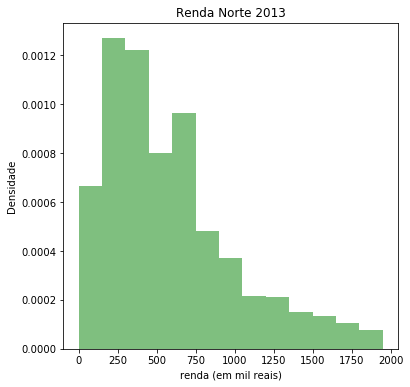

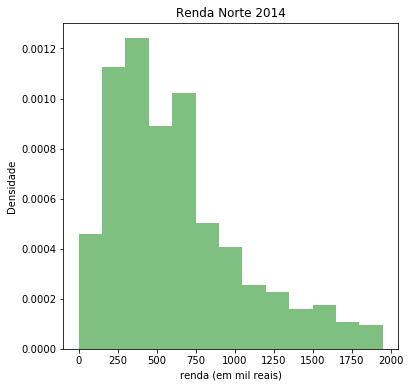

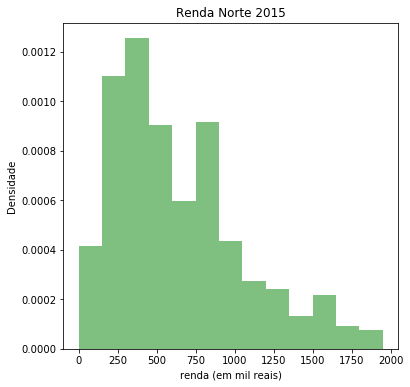

In [299]:
"""Histograma renda quantitativa"""


plot = data13.Renda[data13.Região=='Norte'].plot.hist(bins=faixa,title='Renda Norte 2013',figsize=(6, 6), normed=1, alpha=0.5, color='g')
plt.ylabel('Densidade')
plt.xlabel('renda (em mil reais)')
plt.show()


plot = data14.Renda[data14.Região=='Norte'].plot.hist(bins=faixa,title='Renda Norte 2014',figsize=(6, 6), normed=1, alpha=0.5, color='g')
plt.ylabel('Densidade')
plt.xlabel('renda (em mil reais)')
plt.show()

plot = data15.Renda[data15.Região=='Norte'].plot.hist(bins=faixa,title='Renda Norte 2015',figsize=(6, 6), normed=1, alpha=0.5, color='g')
plt.ylabel('Densidade')
plt.xlabel('renda (em mil reais)')
plt.show()


Os histogramas acima mostram que com o passar dos anos, a situação de renda no Norte passou por uma melhora. A densidade com rendas mais baixas diminuiu e a densidade para rendas maiores aumentou. 

In [300]:
"""Crosstab saneamento e renda quali"""


quant=(pd.crosstab(rendacat13, data13.Saneamento[data13.Região=='Norte'], margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Renda'], normalize='index')*100).round(decimals=1)

quant=(pd.crosstab(rendacat14, data14.Saneamento[data14.Região=='Norte'], margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Renda'], normalize='index')*100).round(decimals=1)

quant=(pd.crosstab(rendacat15, data15.Saneamento[data15.Região=='Norte'], margins=True,  rownames=['Situação de Saneamento'], colnames=['Situação Renda'], normalize='index')*100).round(decimals=1)

A seguir, o gráfico compara a situação de saneamento com a de renda, para 201, 2014 e 2015.

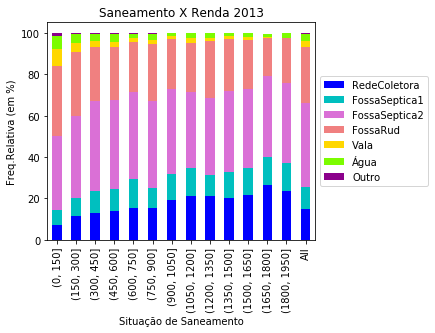

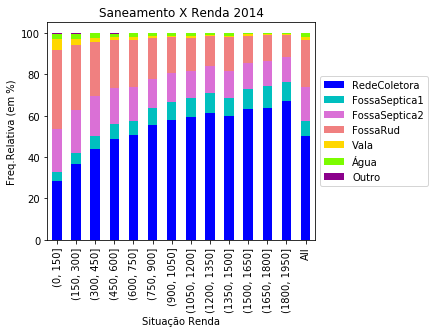

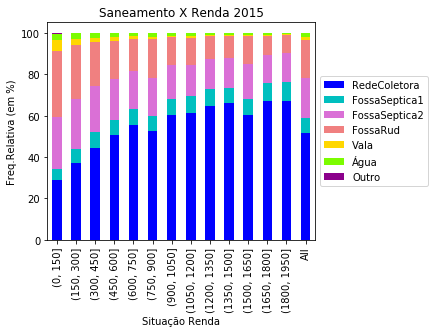

In [301]:
plot = quant.plot(kind='bar', stacked=True,title='Saneamento X Renda 2013', color=('b', 'c', 'orchid', 'lightcoral','gold','lawngreen','darkmagenta',  ))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = quant2.plot(kind='bar', stacked=True,title='Saneamento X Renda 2014', color=('b', 'c', 'orchid', 'lightcoral','gold','lawngreen','darkmagenta',  ))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = quant3.plot(kind='bar', stacked=True,title='Saneamento X Renda 2015', color=('b', 'c', 'orchid', 'lightcoral','gold','lawngreen','darkmagenta',  ))
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




A análise dos gráficos acima confirmam que conforme a renda aumenta, aumenta a porcentagem de pessoas com as melhores situações de saneamento. Percebe-se, novamente, que a matriz de saneamento aumentou bastante para Rede Coletora de Esgoto, e a curva de saneamento cresce junto com a renda, ao mesmo tempo que as outras formas inferiores de saneamento diminuem.

## Conclusão

De acordo com as análises feitas, é possível concluir que a internet no Brasil avançou em todos os anos, mesmo quando não houve melhora nas condições de infraestrutura. Isso acontece, porém, de forma proporcional a algumas variáveis, ou seja, conforme as categorias boas de algumas variáveis aumentava, o índice de internet aumentava também. Isso acontece porque estamos em uma época de intensa globalização e avanços tecnológicos, o que gera o barateamento do acesso a internet, e consequentemente a democratização do acesso à mesma. Com um menor custo, mais pessoas tem condições de acessar a internet. Apesar de haver algumas variáveis onde se observa um aumento de internet conforme as condições das variáveis são melhores, nem todas seguem esse padrão.

As variáveis que apresentam mais relação com o avanço da internet em suas melhores condições são Saneamento Básico e Acesso a Água Canalizada. Quanto mais água canalizada, mais acesso a internet ocorre, e o crescimento da internet é maior em casas com acesso do que em casas sem. Por outro lado, o acesso a água se manteve estável, o que comprova que casas sem saneamento passaram a desenvolver acesso a internet mas não melhora na condição de acesso à água. Isso permite concluir que existe relação entre o avanço da internet em função do parâmetro de infraestrutura doméstica de água canalizada, e também que ao mesmo tempo que isso ocorre, pessoas estão tendo acesso domiciliar à internet mesmo quando não tem melhoras na água. 

Quando se trata do saneamento, o comportamento é igual. Quanto melhor a condição de saneamento, mais acesso à internet. Analogamente à agua, aumentaram as boas condicões de saneamento juntamente com o aumento da internet, e o saneamento ficou em condições estáveis, mostrando que mesmo pessoas com saneamento ruim passaram a ter acesso à internet. A proporção do aumento da internet é maior para condições boas de saneamento do que para condições ruins.

As outras variáveis analisadas não possuem um grau de relação entre melhora na variável e melhora na internet tão nítido como as outras duas, mas sempre se percebe que as melhores condições de todas as variáveis se mantém atreladas a uma melhor porcentagem de internet.

Confirma-se a hipótese de que as condições de moradia tem relação com o comportamento da internet.

A análise mais detalhada do Norte permite afirmar que o comportamento que a região segue é significativamente semelhante ao comportamento do Brasil como um todo, mesmo tendo um índice de crescimento de internet e melhora de casas inferior. A diferença entre o BRasil e a região Norte é que os dados para o Norte apresentam mais precariedade quando comparados ao resto do Brasil. Além disso, percebe-se um aumento na renda per capita do Norte com o passar dos anos, e fica explícita a relação entre saneamento e renda. Como o saneamento e internet tem relação direta, e renda e saneamento também, pode-se afirmar, por consequência, que a renda e o índice de internet também tem uma relação direta.

Retomando a pergunta:

Existe relação entre a variação da taxa de acesso a Internet em Domicílio no Brasil, para 2013, 2014 e 2015, com uma das variáveis analisadas, sendo elas Saneamento, Material da Parede,  acesso a Água Canalizada, Destino do Lixo e Renda? A região menos favorecida em termos de estrutura, renda e internet acompanham o mesmo padrão do Brasil?

Em suma, a pergunta pode ser respondida afirmando que existe relação entre a taxa de acesso à internet com todas as variáveis, mas mais explicitamente com o saneamento, renda e a água canalizada. O Norte, a região com menos renda, menos estrutura, menos internet e mais estagnação, segue um padrão similar ao brasileiro. A diferença que se atesta, é, principalmente, que existe uma grande melhora nas condições de saneamento, onde uma porcentagem passa a ter rede coletora ao invés de fossa rudimentar. Isso pode ter sido consequência de um possível investimento em saneamento por parte do governo, já que a rede coletora depende do governo, e não do cidadão. Mas de modo geral, o padrão seguido é o mesmo.


In [ ]:
.